In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-subspace-unstable)

First we define a triangular matrix with known eigenvalues, and a random vector $b$.

In [2]:
ev = 10 + arange(1, 101)
A = triu(random.rand(100, 100), 1) + diag(ev)
b = random.rand(100)

Next we build up the first ten Krylov matrices iteratively, using renormalization after each matrix-vector multiplication.

In [3]:
Km = zeros([100, 30])
Km[:, 0] = b
for m in range(29):
    v = A @ Km[:, m]
    Km[:, m + 1] = v / norm(v)

Now we solve least-squares problems for Krylov matrices of increasing dimension, recording the residual in each case.

In [4]:
from numpy.linalg import lstsq
resid = zeros(30)
resid[0] = norm(b)
for m in range(1, 30):
    z = lstsq(A @ Km[:, :m], b, rcond=None)[0]
    x = Km[:, :m] @ z
    resid[m] = norm(b - A @ x)

The linear system approximations show smooth linear convergence at first, but the convergence stagnates after only a few digits have been found.

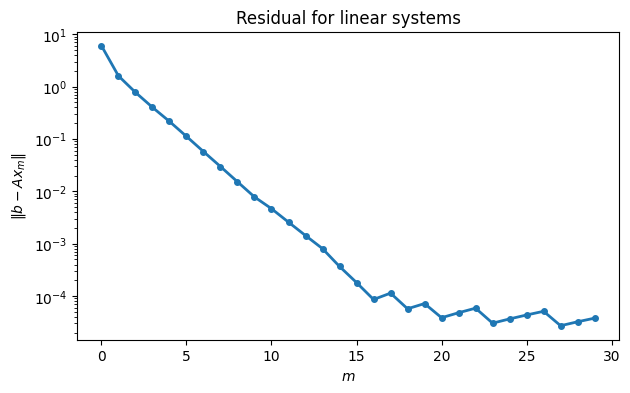

In [5]:
semilogy(range(30), resid, "-o")
xlabel("$m$"),  ylabel("$\\| b-Ax_m \\|$")
title(("Residual for linear systems"));